# Lokendra Yadav-(DS5B-2017)

# Importing neccessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import string

In [3]:
dataset = pd.read_csv('GrammarandProductReviews.csv')

In [4]:
dataset.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [5]:
dataset.shape


(71044, 25)

In [6]:
dataset.isnull().sum()


id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [7]:
dataset['reviews.doRecommend'].value_counts()

True     55587
False     4842
Name: reviews.doRecommend, dtype: int64

In [8]:
dataset['reviews.didPurchase'].value_counts()

False    28476
True      3682
Name: reviews.didPurchase, dtype: int64

In [9]:
dataset['reviews.text']

0        i love this album. it's very good. more to the...
1        Good flavor. This review was collected as part...
2                                             Good flavor.
3        I read through the reviews on here before look...
4        My husband bought this gel for us. The gel cau...
                               ...                        
71039    I'm dealing with dry eyes and very sensitive t...
71040    Great stuff! Helps keep my contacts moist all ...
71041                                          Right price
71042    I was so pleased when this scarf arrived for m...
71043    Excellent album, makes the holidays better, gi...
Name: reviews.text, Length: 71044, dtype: object

In [10]:
dataset['brand'].value_counts().iloc[:10]

Clorox                  10700
Universal Home Video     6178
Tide                     5384
FOX                      4498
Disney                   3692
Olay                     3420
Warner Home Video        3330
L'Oreal Paris            2683
L'oreal Paris            2288
Sony Pictures            2161
Name: brand, dtype: int64

In [11]:
dataset['brand'].value_counts().sort_values(ascending=True).iloc[:5]

National Mfg.          1
Wilton                 1
Horizon                1
Black Radiance         1
Creative Converting    1
Name: brand, dtype: int64

In [12]:
dataset['brand'].value_counts().sort_values(ascending=False).iloc[:5]

Clorox                  10700
Universal Home Video     6178
Tide                     5384
FOX                      4498
Disney                   3692
Name: brand, dtype: int64

In [13]:
#selecting important columns

dataset = dataset[['brand','manufacturer','reviews.didPurchase','reviews.rating', 'reviews.text']]


In [14]:
dataset.isnull().sum()


brand                      0
manufacturer             141
reviews.didPurchase    38886
reviews.rating             0
reviews.text              36
dtype: int64

In [15]:
dataset

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text
0,Universal Music,Universal Music Group / Cash Money,NaN,5,i love this album. it's very good. more to the...
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...
2,Lundberg,Lundberg,True,5,Good flavor.
3,K-Y,K-Y,False,1,I read through the reviews on here before look...
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...
...,...,...,...,...,...
71039,Opti-Free,Opti-Free,False,5,I'm dealing with dry eyes and very sensitive t...
71040,Opti-Free,Opti-Free,False,5,Great stuff! Helps keep my contacts moist all ...
71041,Opti-Free,Opti-Free,False,5,Right price
71042,Bebe Au Lait,Bebe au Lait,NaN,5,I was so pleased when this scarf arrived for m...


In [16]:
dataset['reviews.didPurchase'] = dataset['reviews.didPurchase'].fillna('Not Avialable')


In [17]:
dataset = dataset.dropna()


In [18]:
dataset.isnull().sum()

brand                  0
manufacturer           0
reviews.didPurchase    0
reviews.rating         0
reviews.text           0
dtype: int64

In [19]:
data = dataset['reviews.rating'].value_counts()


<AxesSubplot:>

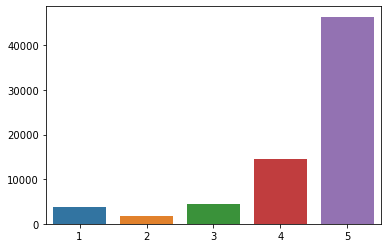

In [20]:
sns.barplot(x=data.index, y=data.values)


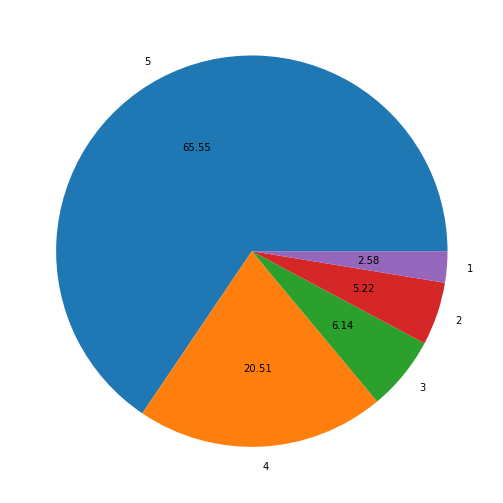

In [21]:
plt.figure(figsize=(16,9))
plt.pie(dataset['reviews.rating'].value_counts(),labels=['5','4','3','2','1'],autopct='%0.2f')
plt.show()

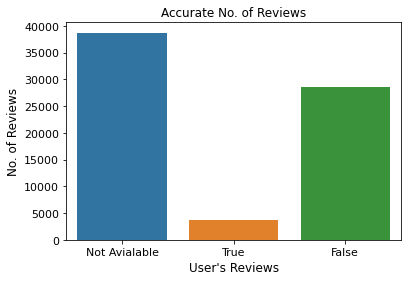

In [22]:
#who all are giving fake reviews?

ax_plt = sns.countplot(dataset['reviews.didPurchase'])
ax_plt.set_xlabel(xlabel="User's Reviews",fontsize=12)
ax_plt.set_ylabel(ylabel='No. of Reviews',fontsize=12)
ax_plt.axes.set_title('Accurate No. of Reviews',fontsize=12)
ax_plt.tick_params(labelsize=11)

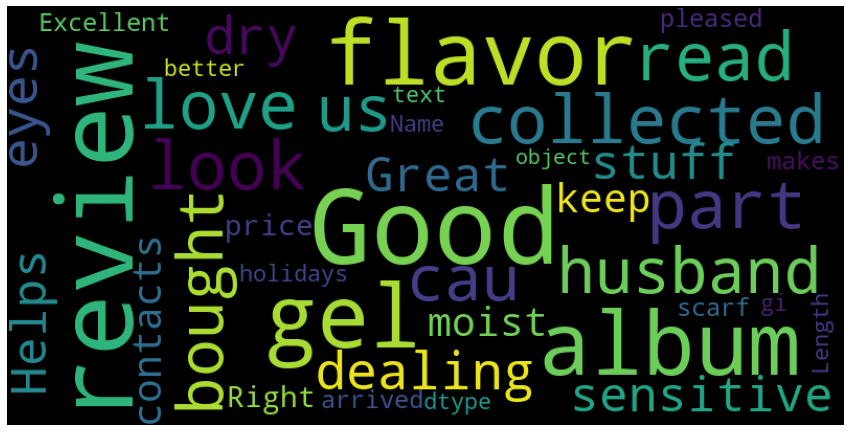

In [23]:
#What are the words that people have used the most in their reviews?

stopwords = set(STOPWORDS)
def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=500,
        max_font_size=50,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(dataset['reviews.text'])

In [24]:
dataset

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text
0,Universal Music,Universal Music Group / Cash Money,Not Avialable,5,i love this album. it's very good. more to the...
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...
2,Lundberg,Lundberg,True,5,Good flavor.
3,K-Y,K-Y,False,1,I read through the reviews on here before look...
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...
...,...,...,...,...,...
71039,Opti-Free,Opti-Free,False,5,I'm dealing with dry eyes and very sensitive t...
71040,Opti-Free,Opti-Free,False,5,Great stuff! Helps keep my contacts moist all ...
71041,Opti-Free,Opti-Free,False,5,Right price
71042,Bebe Au Lait,Bebe au Lait,Not Avialable,5,I was so pleased when this scarf arrived for m...


In [29]:
data=dataset['reviews.text']
train_data=dataset['reviews.text']
y_target=dataset['reviews.rating'].map({1:'Unhappy',2:'Unhappy',3:'Ok',4:'Happy',5:'Happy'})

In [30]:
train_data

0        i love this album. it's very good. more to the...
1        Good flavor. This review was collected as part...
2                                             Good flavor.
3        I read through the reviews on here before look...
4        My husband bought this gel for us. The gel cau...
                               ...                        
71039    I'm dealing with dry eyes and very sensitive t...
71040    Great stuff! Helps keep my contacts moist all ...
71041                                          Right price
71042    I was so pleased when this scarf arrived for m...
71043    Excellent album, makes the holidays better, gi...
Name: reviews.text, Length: 70867, dtype: object

In [31]:
y_target

0          Happy
1          Happy
2          Happy
3        Unhappy
4        Unhappy
          ...   
71039      Happy
71040      Happy
71041      Happy
71042      Happy
71043      Happy
Name: reviews.rating, Length: 70867, dtype: object

# TF-ID Vectorizer

In [32]:
vectorize_word = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1, 1),max_features=20000)
vectorize_word.fit(data)
train_features_word = vectorize_word.transform(train_data)

In [33]:
data

0        i love this album. it's very good. more to the...
1        Good flavor. This review was collected as part...
2                                             Good flavor.
3        I read through the reviews on here before look...
4        My husband bought this gel for us. The gel cau...
                               ...                        
71039    I'm dealing with dry eyes and very sensitive t...
71040    Great stuff! Helps keep my contacts moist all ...
71041                                          Right price
71042    I was so pleased when this scarf arrived for m...
71043    Excellent album, makes the holidays better, gi...
Name: reviews.text, Length: 70867, dtype: object

In [34]:
train_features_word

<70867x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 1149781 stored elements in Compressed Sparse Row format>

In [35]:
pd.DataFrame(train_features_word)

,0
0,"(0, 19148)\t0.1405500194475505\n (0, 15773)..."
1,"(0, 14130)\t0.2903069336444276\n (0, 13135)..."
2,"(0, 7978)\t0.4140006247871171\n (0, 7180)\t..."
3,"(0, 19824)\t0.15255488209554968\n (0, 19586..."
4,"(0, 19692)\t0.27691439604720536\n (0, 17141..."
...,...
70862,"(0, 19519)\t0.15105242401389354\n (0, 18606..."
70863,"(0, 16619)\t0.38711405190478637\n (0, 11259..."
70864,"(0, 14207)\t0.7426869944596568\n (0, 12997)..."
70865,"(0, 19720)\t0.19482730448122512\n (0, 19505..."


In [36]:
vectorize_char = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',ngram_range=(2, 6),max_features=50000)
vectorize_char.fit(data)
train_features_char = vectorize_char.transform(train_data)
train_features = hstack([train_features_char, train_features_word])

In [37]:
train_features_char

<70867x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 50523666 stored elements in Compressed Sparse Row format>

In [38]:
train_features

<70867x70000 sparse matrix of type '<class 'numpy.float64'>'
	with 51673447 stored elements in COOrdinate format>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y_target,test_size=0.2,random_state=101,shuffle=True)


# SVC Model

In [43]:
start = datetime.now()
lsvm = LinearSVC(class_weight='balanced')
l = lsvm.fit(X_train,y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:23.017431



Linear SVC Metric Over Training:

In [44]:
pred_train = l.predict(X_train)

In [45]:
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train)))
print(classification_report(y_train,pred_train))

Accuracy Train: 0.9889051558393452
              precision    recall  f1-score   support

       Happy       1.00      0.99      0.99     48838
          Ok       0.89      0.97      0.93      3452
     Unhappy       0.98      1.00      0.99      4403

    accuracy                           0.99     56693
   macro avg       0.95      0.98      0.97     56693
weighted avg       0.99      0.99      0.99     56693



Linear SVC Metric Over Test:

In [46]:
pred_test=l.predict(X_test)

print("Accuracy Test : {}".format(accuracy_score(y_test,pred_test)))
print(classification_report(y_test,pred_test))

Accuracy Test : 0.900804289544236
              precision    recall  f1-score   support

       Happy       0.95      0.96      0.95     12150
          Ok       0.39      0.37      0.38       898
     Unhappy       0.75      0.73      0.74      1126

    accuracy                           0.90     14174
   macro avg       0.70      0.68      0.69     14174
weighted avg       0.90      0.90      0.90     14174



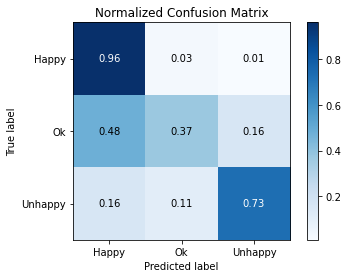

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test, normalize=True)
plt.show()

# SGD Classifier:

In [48]:
start = datetime.now()
svm1=SGDClassifier(class_weight='balanced',n_jobs=-1,max_iter=300)
svm1.fit(X_train,y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:01.921860



SGD Metric Over Training:

In [49]:

pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))

Accuracy Train: 0.9373467623868909
              precision    recall  f1-score   support

       Happy       0.98      0.96      0.97     48838
          Ok       0.60      0.69      0.64      3452
     Unhappy       0.82      0.88      0.85      4403

    accuracy                           0.94     56693
   macro avg       0.80      0.84      0.82     56693
weighted avg       0.94      0.94      0.94     56693



SGD Metric Over Test:

In [50]:
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

Accuracy Test: 0.8991816001128827
              precision    recall  f1-score   support

       Happy       0.95      0.95      0.95     12150
          Ok       0.39      0.38      0.39       898
     Unhappy       0.72      0.75      0.73      1126

    accuracy                           0.90     14174
   macro avg       0.69      0.69      0.69     14174
weighted avg       0.90      0.90      0.90     14174



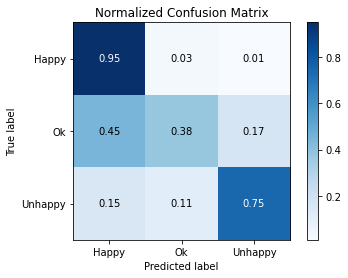

In [51]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test_sgd, normalize=True)
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingRegressor,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:
start = datetime.now()
svm1=AdaBoostClassifier()
svm1.fit(X_train,y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:05:04.561335


In [54]:
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

Accuracy Test: 0.8839424298010442
              precision    recall  f1-score   support

       Happy       0.90      0.98      0.94     12150
          Ok       0.44      0.06      0.11       898
     Unhappy       0.67      0.48      0.56      1126

    accuracy                           0.88     14174
   macro avg       0.67      0.51      0.53     14174
weighted avg       0.85      0.88      0.86     14174



In [55]:
pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))

Accuracy Train: 0.8871642001658053
              precision    recall  f1-score   support

       Happy       0.91      0.98      0.94     48838
          Ok       0.46      0.07      0.12      3452
     Unhappy       0.66      0.49      0.57      4403

    accuracy                           0.89     56693
   macro avg       0.68      0.52      0.54     56693
weighted avg       0.86      0.89      0.86     56693



In [ ]:
start = datetime.now()
svm1=GradientBoostingClassifier()
svm1.fit(X_train,y_train)
print("Time taken to run this cell :", datetime.now() - start)

In [ ]:
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

In [ ]:

pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))

In [ ]:
start = datetime.now()
svm1=ExtraTreesClassifier()
svm1.fit(X_train,y_train)
print("Time taken to run this cell :", datetime.now() - start)

In [ ]:
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

In [ ]:

pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))